# Trajectory Regularization - Smoothed Spline


In [15]:
import minisom as ms
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import clustering as clr

PATH = '/Users/orientamento/Desktop/idrad/means_vars_finale/'
CODE = '4_040'

In [16]:
with open(PATH+'means_vars'+CODE+'.p', 'rb') as infile:
    means_true, vars_true = pickle.load(infile)
n_frame = means_true.shape[0]
time = np.arange(n_frame).T.reshape((n_frame,1))
data = np.concatenate((time, means_true[:,0:2]), axis=1)

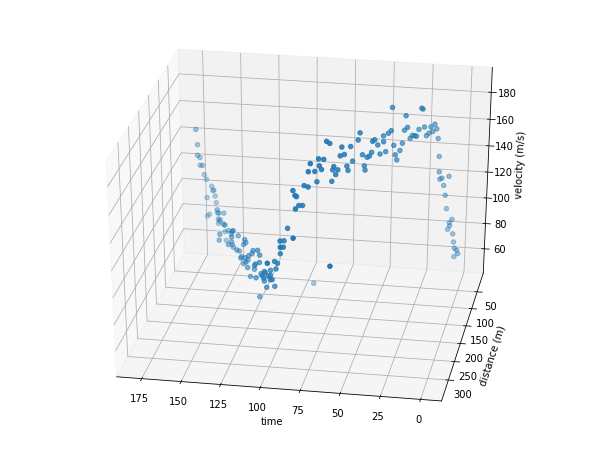

In [17]:
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

ax.scatter(time, data[:,1], data[:,2], marker='o')

ax.set_xlabel('time')
ax.set_ylabel('distance (m)')
ax.set_zlabel('velocity (m/s)')

ax.view_init(azim=100)

plt.show()

## Smoothed spline on denoised means series

In [18]:
import rpy2
import rpy2.robjects as robjects

smooth_spline = robjects.r['smooth.spline']
pred = robjects.r['predict']

def smooth_spline_(x, y): 
    """compute the smoothed spline of two variables, in this case use x as time"""
    return np.array(pred(smooth_spline(robjects.IntVector(x),robjects.IntVector(y)), 
     robjects.IntVector(time))[1])

In [19]:
time, distance, velocity  = np.array(range(n_frame)), data[:,1], data[:,2]
fit_1 = smooth_spline_(time, distance)
fit_2 = smooth_spline_(time, velocity)

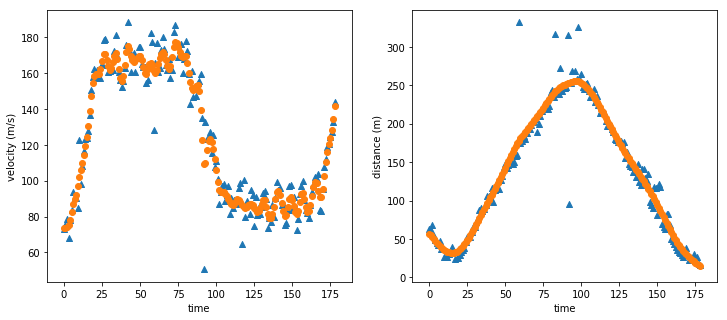

In [20]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
plt.ylabel('velocity (m/s)')
plt.xlabel('time')
ax.scatter(time, velocity, marker="^")
ax.scatter(time, fit_2, marker='o')


ax = fig.add_subplot(122)
plt.ylabel('distance (m)')
plt.xlabel('time')
ax.scatter(time, distance, marker="^")
ax.scatter(time, fit_1, marker='o')


plt.show()

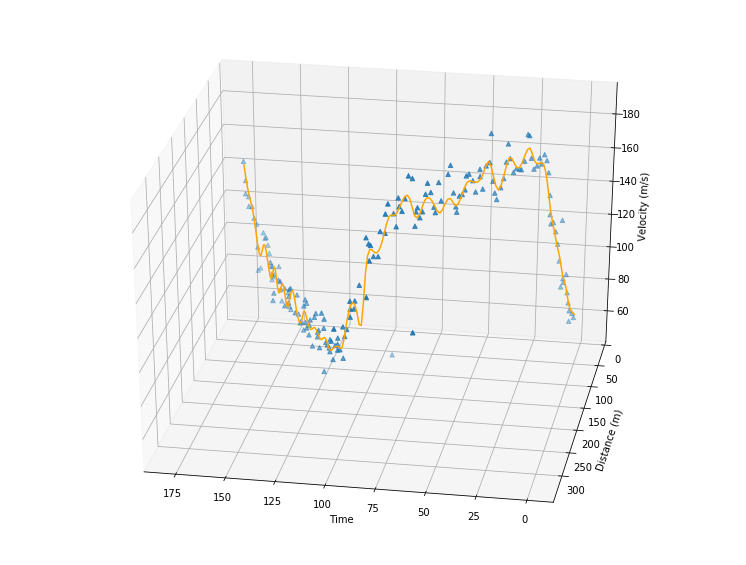

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection='3d')
# plot all points
ax.scatter(data[:,0], data[:,1], data[:,2], marker='^')
# plots the smoothed spline
ax.plot3D(data[:,0], fit_1, fit_2, color='orange')
#plt.axis('off')

ax.set_xlabel('Time')
ax.set_ylabel('Distance (m)')
ax.set_zlabel('Velocity (m/s)' )
ax.view_init(azim=100)
plt.show()

#plt.savefig('GIF/SOM/{}.png'.format(azim))

## Smoothed spline for variances

In [22]:
fit_4 = smooth_spline_(time, vars_true[:,0])
fit_3 = smooth_spline_(time, vars_true[:,1])

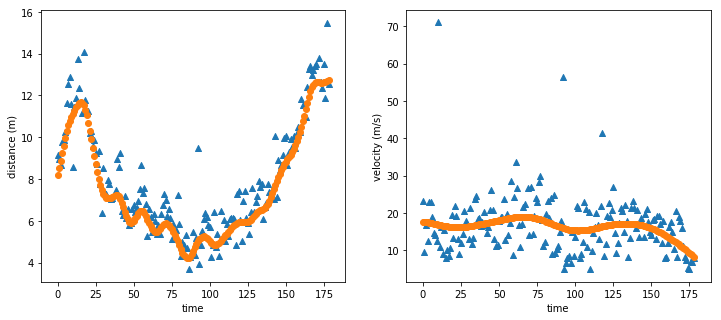

In [23]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(122)
plt.ylabel('velocity (m/s)')
plt.xlabel('time')
ax.scatter(time, vars_true[:,0], marker="^")
ax.scatter(time, fit_4, marker='o')
#ax.plot(x_new_dbscan, y_new_dbscan[:,1], color='orange')

ax = fig.add_subplot(121)
plt.ylabel('distance (m)')
plt.xlabel('time')
ax.scatter(time, vars_true[:,1], marker="^")
ax.scatter(time, fit_3, marker='o')
#ax.plot(x_new_dbscan, y_new_dbscan[:,0], color='orange')

plt.show()

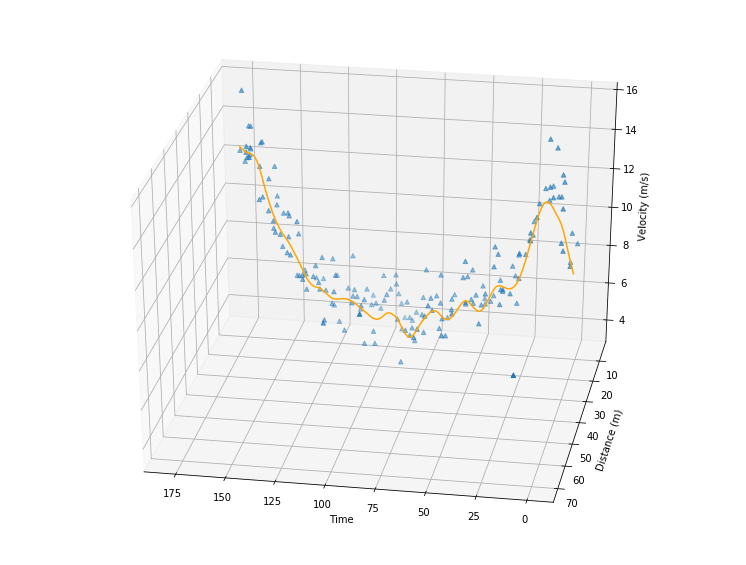

In [24]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection='3d')
# plot all points
ax.scatter(data[:,0], vars_true[:,0], vars_true[:,1], marker='^')
# plots the smoothed spline
ax.plot3D(data[:,0], fit_4, fit_3, color='orange')
#plt.axis('off')

ax.set_xlabel('Time')
ax.set_ylabel('Distance (m)')
ax.set_zlabel('Velocity (m/s)' )
ax.view_init(azim=100)
plt.show()
#plt.savefig('GIF/SOM/{}.png'.format(azim))

## Final plot

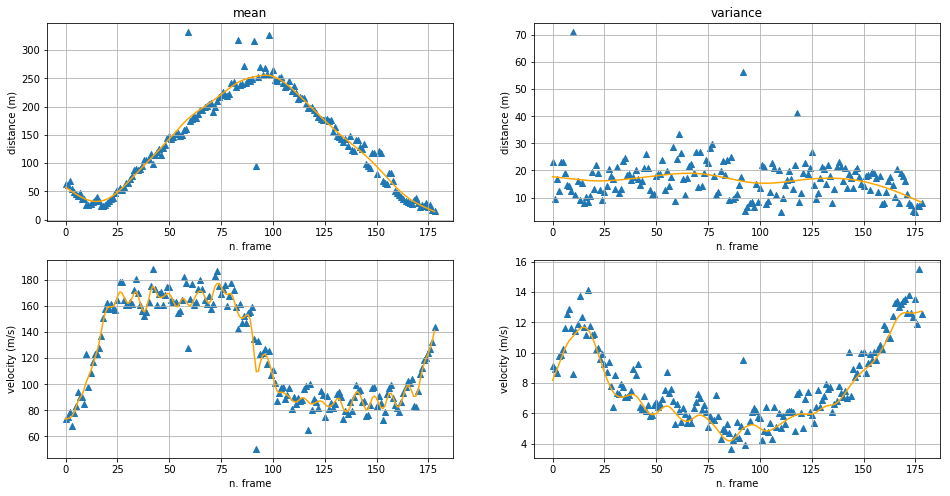

In [25]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(221)
plt.title('mean')
plt.ylabel('distance (m)')
plt.xlabel('n. frame')
plt.grid()
ax.scatter(time, distance, marker="^")
ax.plot(time, fit_1 ,c="orange")

ax = fig.add_subplot(222)
plt.title('variance')
plt.ylabel('distance (m)')
plt.xlabel('n. frame')
plt.grid()
ax.scatter(time, vars_true[:,0], marker="^")
ax.plot(time, fit_4, c="orange")

ax = fig.add_subplot(223)
plt.xlabel('n. frame')
plt.ylabel('velocity (m/s)')
plt.grid()
ax.scatter(time, velocity, marker="^")
ax.plot(time, fit_2, c="orange")

ax = fig.add_subplot(224)
plt.xlabel('n. frame')
plt.ylabel('velocity (m/s)')

plt.grid()
ax.scatter(time, vars_true[:,1], marker="^")
ax.plot(time, fit_3, c="orange")

plt.show()